In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import time
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, SimpleRNN
from keras.layers.wrappers import TimeDistributed
import keras.callbacks
from keras import optimizers
import argparse
import pickle
from RNN_utils import *



/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
DEFAULT_LAYERS = 2
DEFAULT_HIDDEN = 500
DEFAULT_DROPOUT = 0.15

DATA_DIR = './data/shakespeare_input.txt'
BATCH_SIZE = 30
SEQ_LENGTH = 50

num_epochs = 50

# Creating training data
X, y, VOCAB_SIZE, ix_to_char, char_to_ix = load_data(DATA_DIR, SEQ_LENGTH)

Data length: 4573338 characters
Vocabulary size: 67 characters


In [3]:
# Split testing data from training/validation data
train_split = 0.8
test_ind = int(round(train_split*len(X)))
X_test = X[test_ind:]
y_test = y[test_ind:]
X_train = X[:test_ind]
y_train = y[:test_ind]

In [4]:
model = make_lstm_model(VOCAB_SIZE, DEFAULT_LAYERS, DEFAULT_HIDDEN, DEFAULT_DROPOUT)

In [7]:
history = model.fit(X_train, y_train, batch_size=50, validation_split=0.2, epochs=50, verbose=1)


Train on 58538 samples, validate on 14635 samples
Epoch 1/50
58538/58538 [==============================] - 599s 10ms/step - loss: 2.2002 - val_loss: 1.8073
Epoch 2/50
58538/58538 [==============================] - 598s 10ms/step - loss: 1.6659 - val_loss: 1.6724
Epoch 3/50
58538/58538 [==============================] - 598s 10ms/step - loss: 1.5162 - val_loss: 1.6042
Epoch 4/50
58538/58538 [==============================] - 601s 10ms/step - loss: 1.4426 - val_loss: 1.5808
Epoch 5/50
58538/58538 [==============================] - 600s 10ms/step - loss: 1.3977 - val_loss: 1.5551
Epoch 6/50
58538/58538 [==============================] - 598s 10ms/step - loss: 1.3664 - val_loss: 1.5508
Epoch 7/50
58538/58538 [==============================] - 598s 10ms/step - loss: 1.3432 - val_loss: 1.5370
Epoch 8/50
58538/58538 [==============================] - 598s 10ms/step - loss: 1.3239 - val_loss: 1.5374
Epoch 9/50
58538/58538 [==============================] - 601s 10ms/step - loss: 1.3081 - val_

In [9]:
save_model(model, history.history, DEFAULT_LAYERS, DEFAULT_HIDDEN, DEFAULT_DROPOUT)


saving: layers_2_hidden_500_dropout_1_epoch_50


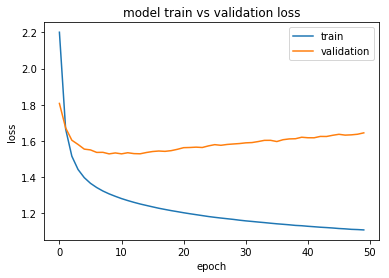

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [11]:
generate_text(model, 100, VOCAB_SIZE, ix_to_char, [char_to_ix['H']], 0)

Here is a man that had a heart
To take a brothel of the world.

CORNWALL:
What say you?

CASSIUS:
I 

'Here is a man that had a heart\nTo take a brothel of the world.\n\nCORNWALL:\nWhat say you?\n\nCASSIUS:\nI w'

In [23]:
generate_text(model, 500, VOCAB_SIZE, ix_to_char, [char_to_ix['H']], 1)

HARD II:
Why, momenture doth fall from this faithless? shall they tee-fall!
O, Caesar from his grave?

CLAUDIO:
The empress fierce, you may do no man's day. O Romeo
Cominius is the more admired to this.

TRANIO:
She is alone; not for the better than your queen:
Thanks would murder it, though you should deny, or ge unto the poor
And service of no less place in your death.
Why hast thou done? required me to thy apparel?

DECIUS BRUTUS:
O Lord, sir! heart thou hast,
Thus far more unitely insolent e

"HARD II:\nWhy, momenture doth fall from this faithless? shall they tee-fall!\nO, Caesar from his grave?\n\nCLAUDIO:\nThe empress fierce, you may do no man's day. O Romeo\nCominius is the more admired to this.\n\nTRANIO:\nShe is alone; not for the better than your queen:\nThanks would murder it, though you should deny, or ge unto the poor\nAnd service of no less place in your death.\nWhy hast thou done? required me to thy apparel?\n\nDECIUS BRUTUS:\nO Lord, sir! heart thou hast,\nThus far more unitely insolent en"

In [20]:
history.history['val_loss'][-1]

1.6449453543183092